In [32]:
import pandas as pd
import sys

sys.path.append('../../')
from src.transform import load_json
from src.plot_helpers import plot_correlation_matrix

indoors_cols = load_json("../../json/locations.json")["wings_indoors"]


In [33]:
df = pd.read_csv('../../data/clean_data/airwings.csv',index_col=0,parse_dates=True)
df

,co2,tvoc,co,pm_1.0,pm_2.5,pm_10,temperature,humidity,pressure,device_id,sensor,no2,o3,so2,no,noise
datetime,,,,,,,,,,,,,,,,
2024-10-16 05:00:43,657.32,0.0,0.50,2.15,2.27,2.24,26.60,33.00,1010.26,2.0,air_wings_indoor,NaN,NaN,NaN,NaN,NaN
2024-10-16 05:01:43,657.32,0.0,0.50,2.15,2.25,2.23,26.60,33.00,1010.28,2.0,air_wings_indoor,NaN,NaN,NaN,NaN,NaN
2024-10-16 05:02:43,657.31,0.0,0.50,2.13,2.24,2.22,26.60,33.00,1010.30,2.0,air_wings_indoor,NaN,NaN,NaN,NaN,NaN
2024-10-16 05:03:43,657.31,0.0,0.50,2.05,2.15,2.13,26.59,33.00,1010.30,2.0,air_wings_indoor,NaN,NaN,NaN,NaN,NaN
2024-10-16 05:04:43,657.31,0.0,0.50,2.00,2.11,2.09,26.59,33.00,1010.31,2.0,air_wings_indoor,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-20 23:43:06,442.50,NaN,413.80,4.77,10.35,19.73,8.21,76.60,1017.00,402.0,air_wings_outdoor_ref,15.25,41.98,0.89,1.26,131.0
2024-10-20 23:47:12,443.25,NaN,401.21,4.64,10.18,18.93,8.07,76.21,1017.00,402.0,air_wings_outdoor_ref,14.92,41.93,0.91,1.25,131.0
2024-10-20 23:51:17,444.75,NaN,398.38,4.49,10.18,20.08,8.03,76.88,1017.00,402.0,air_wings_outdoor_ref,15.19,41.99,0.88,1.24,131.0


In [41]:
df_air_indoor = df.loc[(df['sensor'] == 'air_wings_indoor') | (df['sensor'] == 'air_wings_indoor_ref'), indoors_cols]

df_air_indoor

,co2,tvoc,co,pm_1.0,pm_2.5,pm_10,temperature,humidity,pressure,device_id
datetime,,,,,,,,,,
2024-10-16 05:00:43,657.32,0.00,0.5,2.15,2.27,2.24,26.60,33.0,1010.26,2.0
2024-10-16 05:01:43,657.32,0.00,0.5,2.15,2.25,2.23,26.60,33.0,1010.28,2.0
2024-10-16 05:02:43,657.31,0.00,0.5,2.13,2.24,2.22,26.60,33.0,1010.30,2.0
2024-10-16 05:03:43,657.31,0.00,0.5,2.05,2.15,2.13,26.59,33.0,1010.30,2.0
2024-10-16 05:04:43,657.31,0.00,0.5,2.00,2.11,2.09,26.59,33.0,1010.31,2.0
...,...,...,...,...,...,...,...,...,...,...
2024-10-20 23:36:15,1053.40,1217.67,0.5,36.02,38.17,38.26,26.49,41.0,1017.03,316.0
2024-10-20 23:41:15,1054.87,1224.10,0.5,36.10,38.21,38.25,26.49,41.0,1017.02,316.0
2024-10-20 23:46:16,1055.30,1226.17,0.5,36.24,38.34,38.35,26.48,41.0,1017.05,316.0


In [43]:
pivoted_df = df_air_indoor.pivot(columns='device_id').resample('240s').mean()

## Compare readings between devices  --> 316.0 is referent device

### PM 10

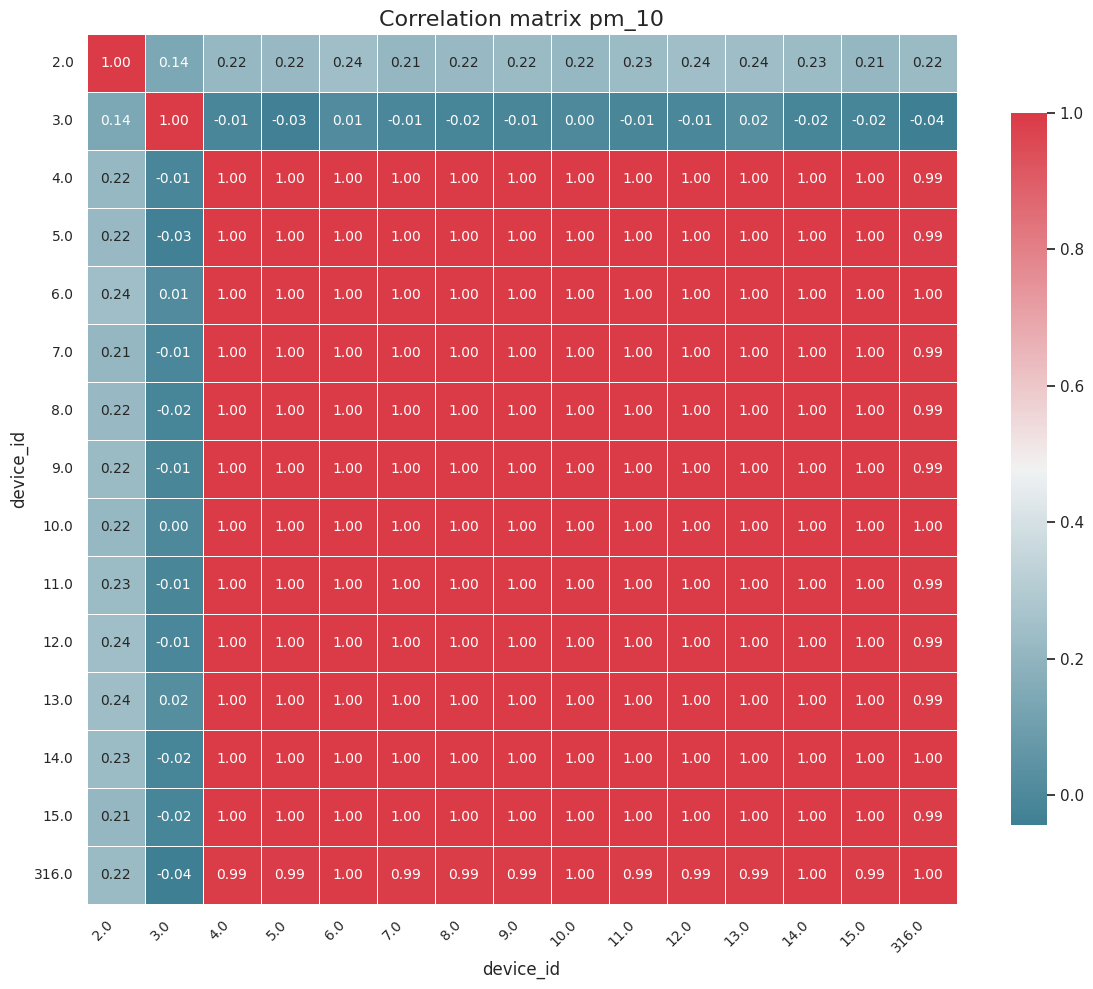

In [44]:

plot_correlation_matrix(pivoted_df["pm_10"].corr(),title="Correlation matrix pm_10")

### PM 2.5

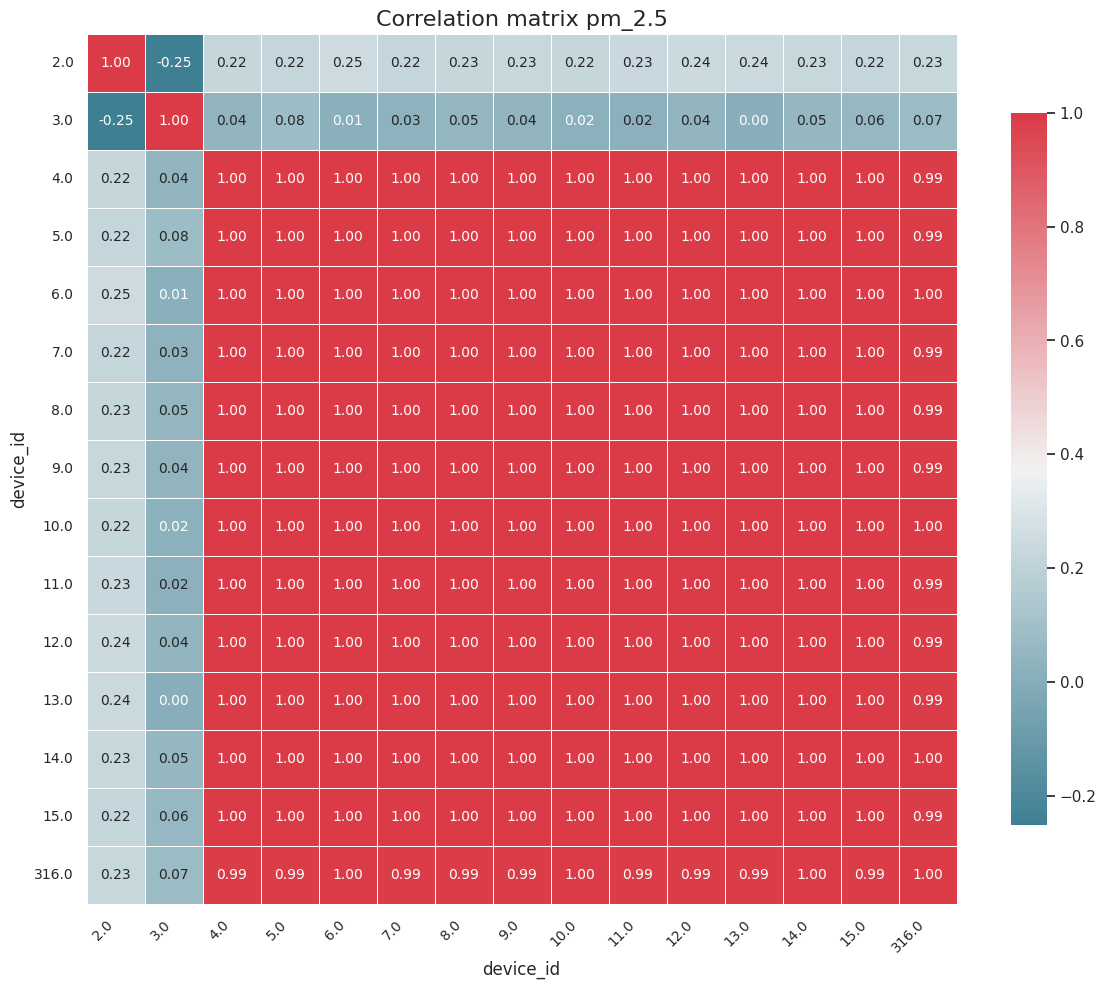

In [45]:
plot_correlation_matrix(pivoted_df["pm_2.5"].corr(),title="Correlation matrix pm_2.5")

### PM 1.0

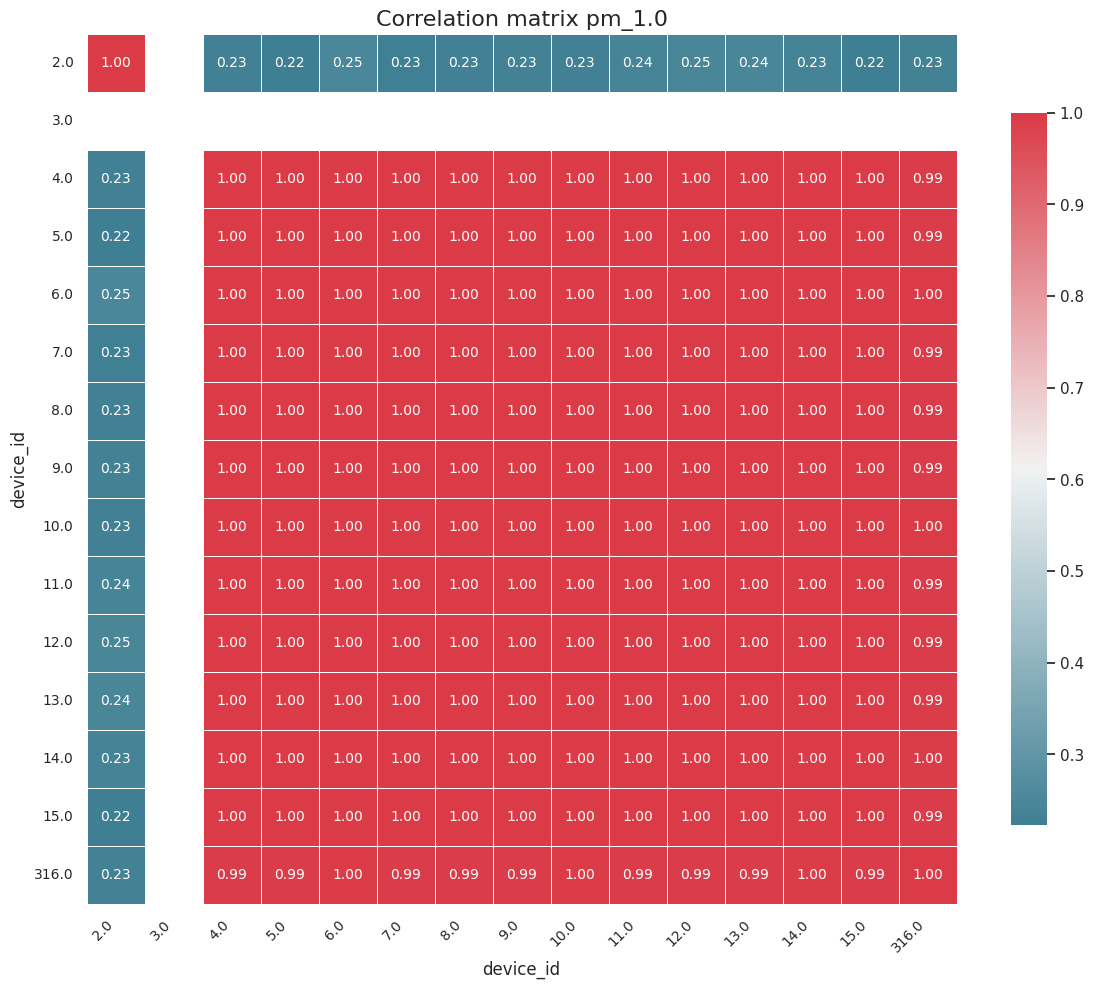

In [46]:
plot_correlation_matrix(pivoted_df["pm_1.0"].corr(),title="Correlation matrix pm_1.0")

### CO2

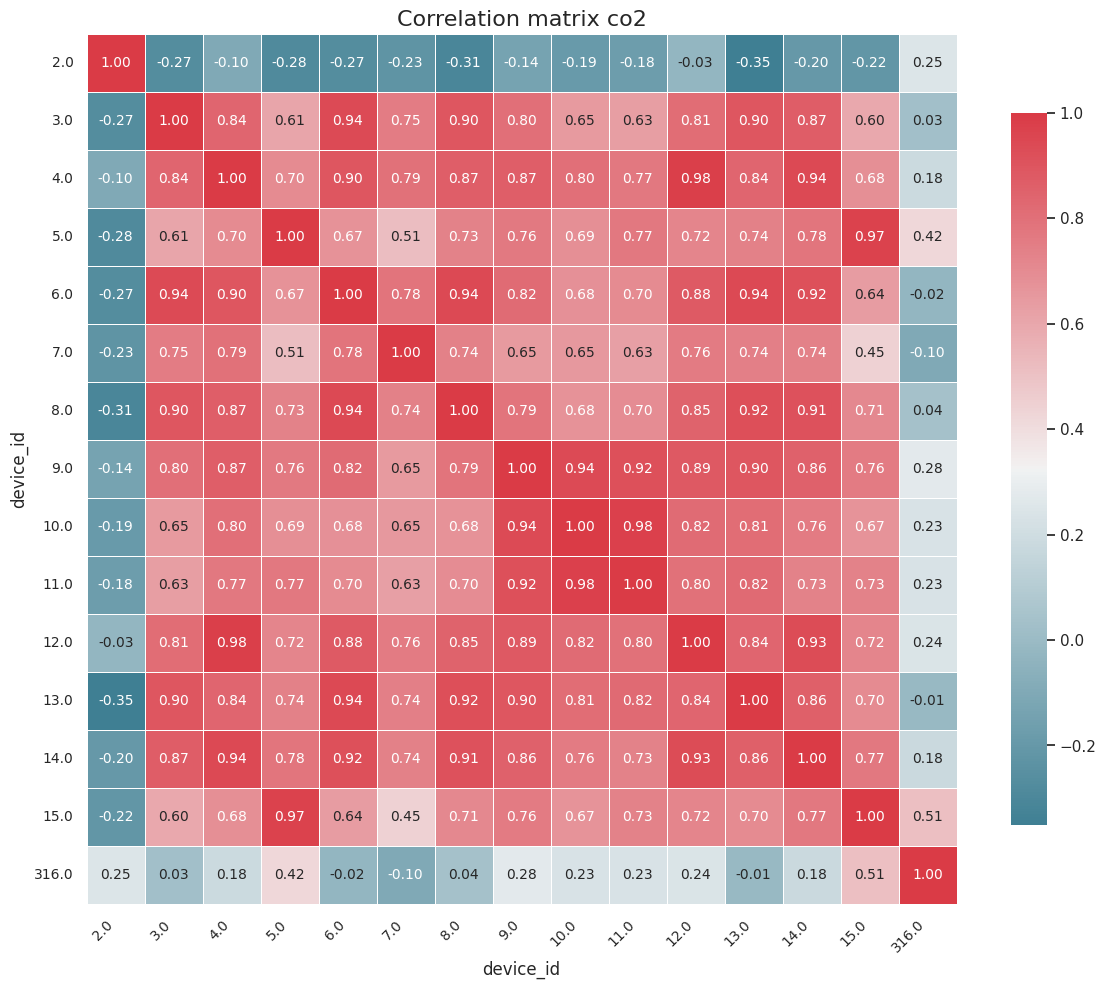

In [47]:
plot_correlation_matrix(pivoted_df["co2"].corr(),title="Correlation matrix co2")

### tvoc

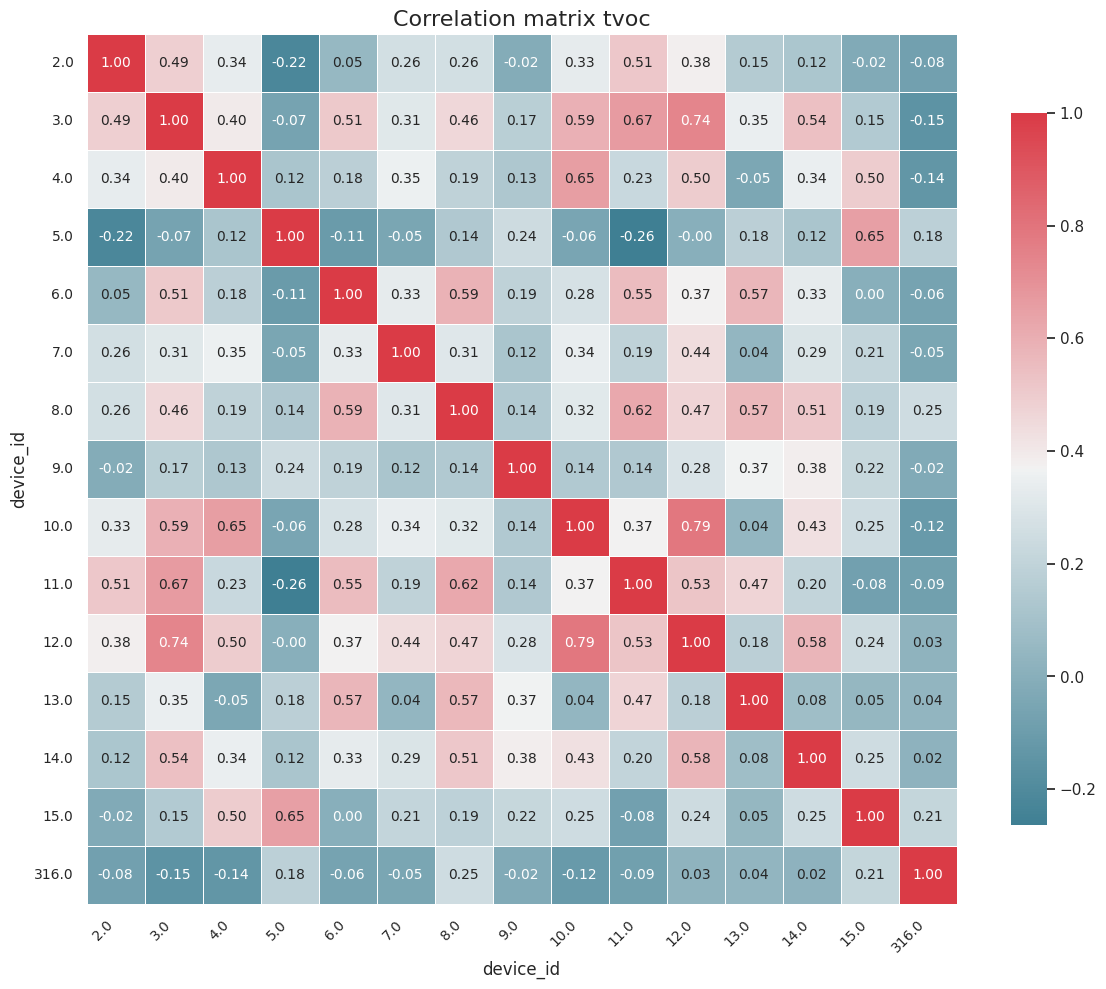

In [48]:
plot_correlation_matrix(pivoted_df["tvoc"].corr(),title="Correlation matrix tvoc")

### temperature

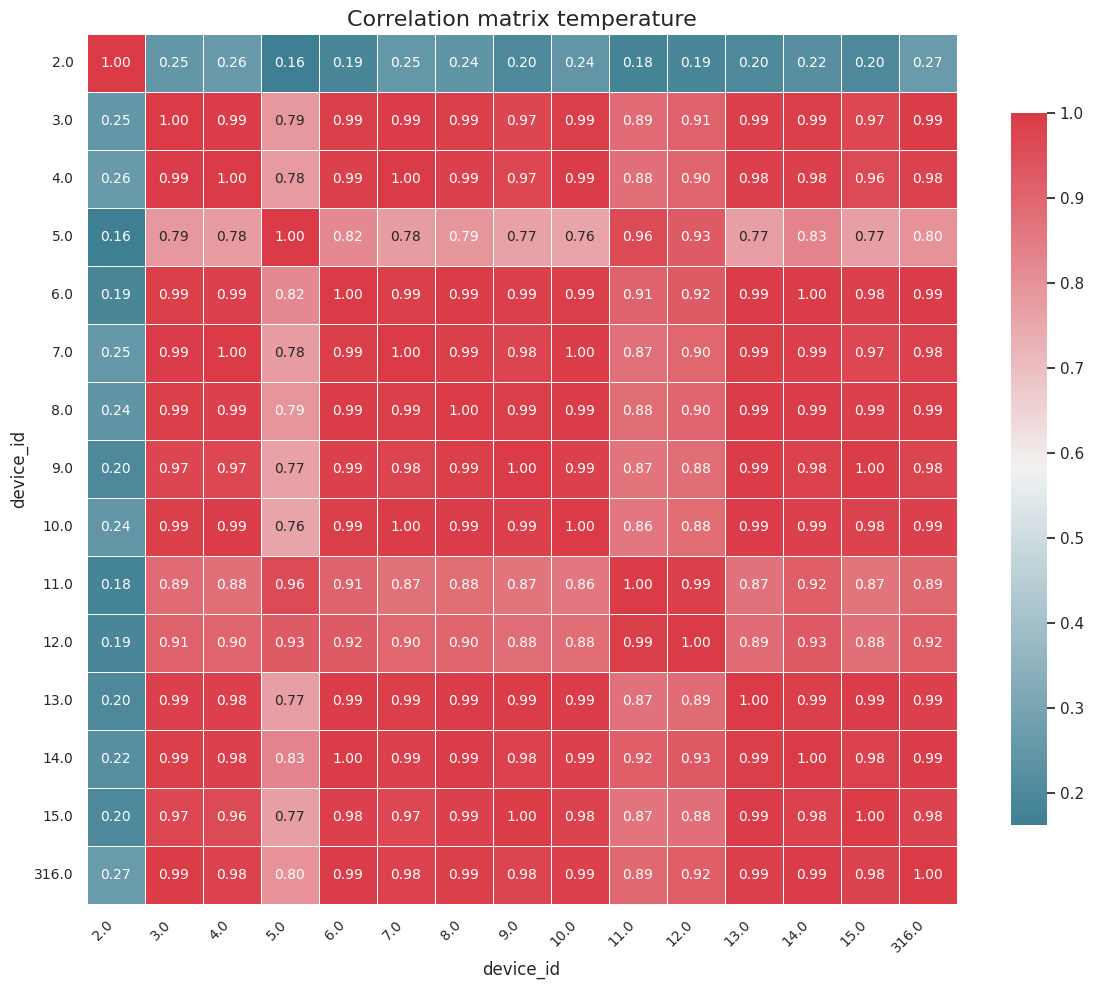

In [50]:
plot_correlation_matrix(pivoted_df["temperature"].corr(),title="Correlation matrix temperature")

### humidity

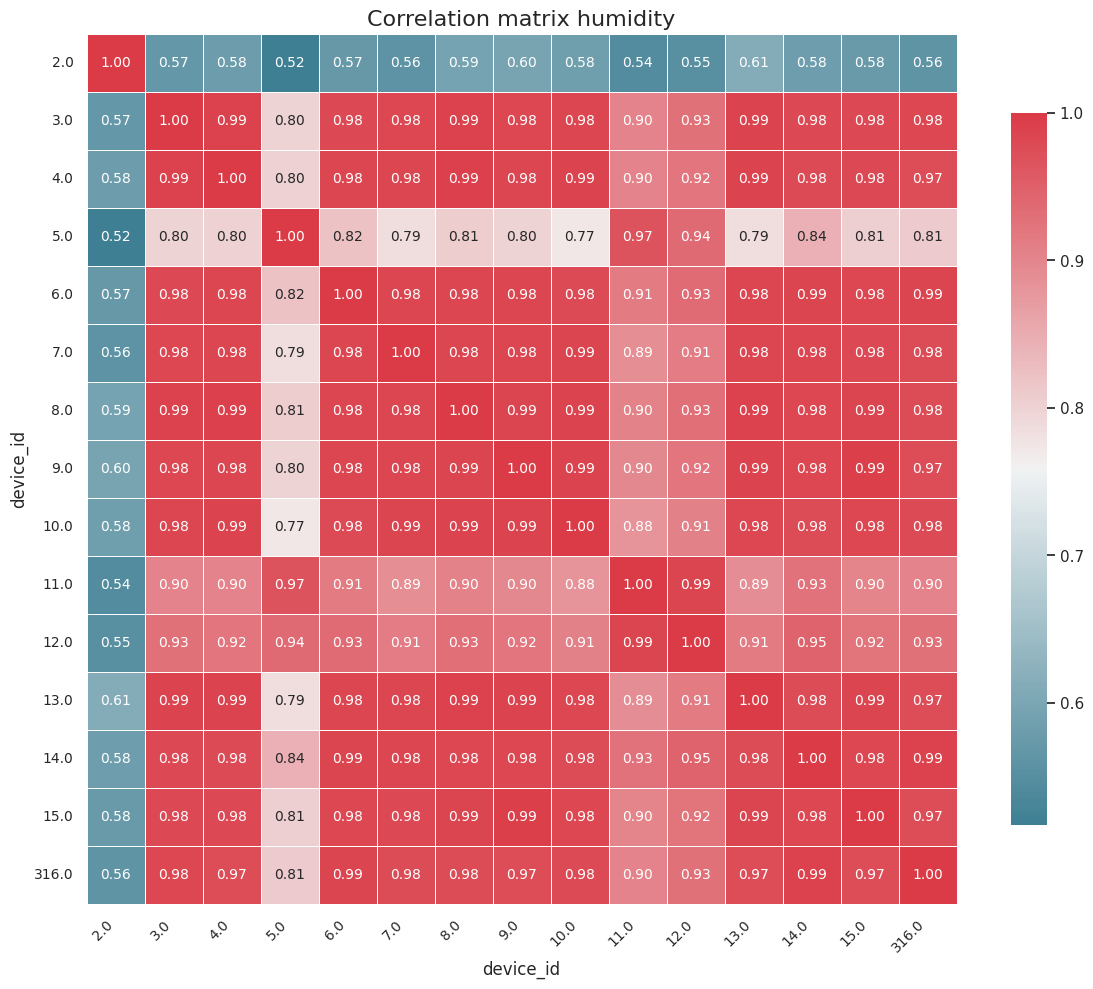

In [51]:
plot_correlation_matrix(pivoted_df["humidity"].corr(),title="Correlation matrix humidity")